In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [16]:
# load the data points
with open('20170202c059_RPE1_CAG_H2B_Halotag_TMR80pM_nonlam_non_starve_ctrl_info.txt', 'r') as f:
    lines = f.readlines()
    coords = np.zeros((len(lines), 2))
    for i in range(len(lines)):
        line = lines[i].split('\t')
        coords[i,0] = float(line[2])
        coords[i,1] = float(line[3])

# convert coords to a list of tuples
coords = [tuple(x) for x in coords]


In [17]:
def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    return 1 if val > 0 else 2

def graham_scan(points):
    n = len(points)
    if n < 3:
        return points

    # select the bottommost point as the pivot
    pivot = min(range(n), key=lambda i: (points[i][1], points[i][0]))
    # sort the points radially around the pivot using polar angle
    sorted_points = sorted(range(n), key=lambda i: (math.atan2(points[i][1] - points[pivot][1], points[i][0] - points[pivot][0]), points[i]))

    # initialize the stack
    hull = [sorted_points[0], sorted_points[1]]
    for i in range(2, n):
        # pop the last element from the stack if the points are counter-clockwise
        while len(hull) > 1 and orientation(points[hull[-2]], points[hull[-1]], points[sorted_points[i]]) != 2:
            hull.pop()
        # push the current point onto the stack
        hull.append(sorted_points[i])

    return [points[i] for i in hull]

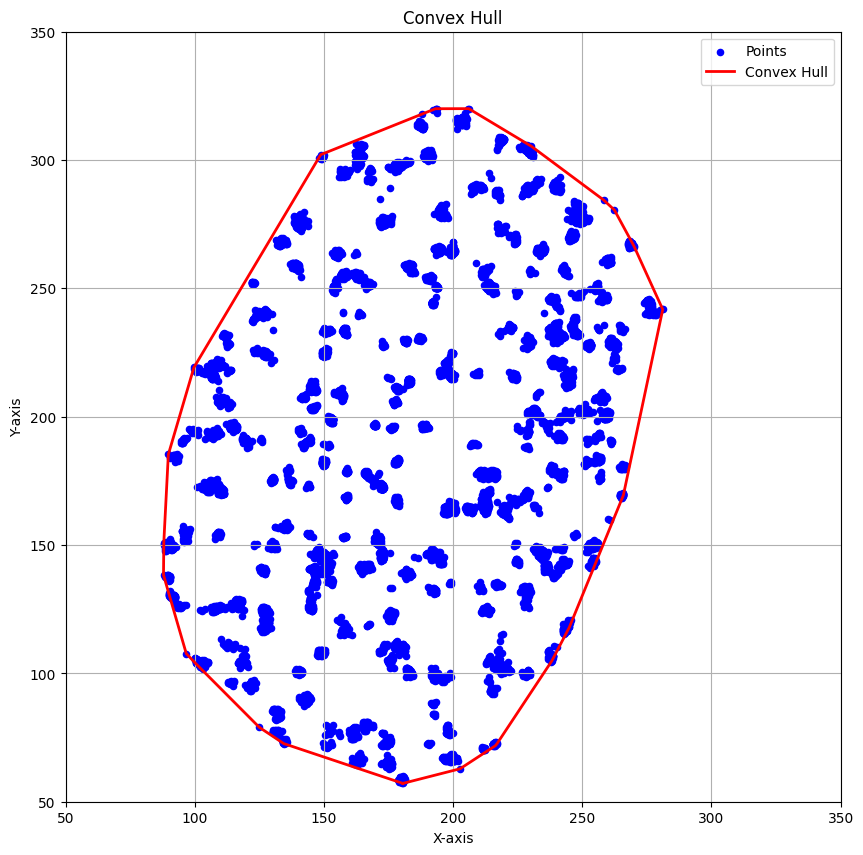

In [18]:
'''Application'''

points = coords
convex_hull = graham_scan(points)

# Plotting the points
x, y = zip(*points)
plt.figure(figsize=(10, 10))
plt.scatter(x, y, color='blue', label='Points', s=20)

# Plotting the convex hull
hull_x, hull_y = zip(*convex_hull + [convex_hull[0]])  # Closing the hull loop
plt.plot(hull_x, hull_y, color='red', linestyle='-', linewidth=2, label='Convex Hull')

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Convex Hull')
plt.legend()
plt.xlim(50, 350)
plt.ylim(50, 350)
plt.grid()

# Show the plot
plt.show()

In [19]:
# print the hull points
print(f'Number of points in the convex hull: {len(convex_hull)}')
for i in range(len(convex_hull)):
    print(convex_hull[i][0], convex_hull[i][1])

# save the hull points
with open('hull_points.txt', 'w') as f:
    for i in range(len(convex_hull)):
        f.write(f'{convex_hull[i][0]}\t{convex_hull[i][1]}\n')

Number of points in the convex hull: 26
180.53 57.143
202.66 62.833
216.36 71.84
217.04 72.704
238.2 104.87
244.95 117.91
265.88 169.38
281.13 241.8
269.9 266.66
262.4 280.56
258.24 284.44
230.25 305.39
206.04 320.03
193.17 320.0
188.06 317.96
148.75 302.1
148.07 300.98
99.647 219.18
89.752 185.29
87.991 150.96
87.878 138.36
90.066 130.7
96.688 107.73
100.67 103.52
124.98 78.969
134.42 72.657


In [20]:
# read the hull points from file
with open('hull_points.txt', 'r') as f:
    lines = f.readlines()
    coords = np.zeros((len(lines), 2))
    for i in range(len(lines)):
        line = lines[i].split('\t')
        coords[i,0] = float(line[0])
        coords[i,1] = float(line[1])

print(coords)

[[180.53   57.143]
 [202.66   62.833]
 [216.36   71.84 ]
 [217.04   72.704]
 [238.2   104.87 ]
 [244.95  117.91 ]
 [265.88  169.38 ]
 [281.13  241.8  ]
 [269.9   266.66 ]
 [262.4   280.56 ]
 [258.24  284.44 ]
 [230.25  305.39 ]
 [206.04  320.03 ]
 [193.17  320.   ]
 [188.06  317.96 ]
 [148.75  302.1  ]
 [148.07  300.98 ]
 [ 99.647 219.18 ]
 [ 89.752 185.29 ]
 [ 87.991 150.96 ]
 [ 87.878 138.36 ]
 [ 90.066 130.7  ]
 [ 96.688 107.73 ]
 [100.67  103.52 ]
 [124.98   78.969]
 [134.42   72.657]]


In [21]:
from shapely.geometry import Point, Polygon
import geopandas as gpd

cell_polygon = Polygon(coords)
print(cell_polygon.area)

# check if a point is inside the polygon
point = Point(250, 125)
print(cell_polygon.contains(point))

# find distance of point to the polygon
print(cell_polygon.distance(point))
print(cell_polygon.exterior.distance(point))

36453.647215
False
2.0072743080345896
2.0072743080345896
